In [1]:
using FractalIntegrals, Plots

In [2]:
import FractalIntegrals: singlelayer_operator_helmholtz,
                            discretise,
                            farfield_pattern,
                            singlelayer_potential_helmholtz

Model incident plane wave $u^i(x) = \mathrm{e}^{\mathrm{i}k d\cdot x}$,

In [3]:
k = 15
d = [1, 1] / sqrt(2)
uⁱ(x) = exp(im*k*((d[1]*x[1])+(d[2]*x[2])));

scattering by fractal $\Gamma$.

In [4]:
# Γ = getfractal("cantor set", ρ = 0.5)
Γ = getfractal("cantordust", ρ = 1/3)
# Γ = getfractal("koch curve")
;

## The Boundary Integral Equation

Define single layer operator on Cantor set $\Gamma$, w.r.t Hausdorff measure:
$$
S_k\phi(x) = \int_\Gamma \Phi(x,y)~\phi(y)~\mathrm{d}\mathcal{H}^d(y),\quad x\in\Gamma.
$$

In [5]:
Sₖ = singlelayer_operator_helmholtz(Γ, k, ambient_dimension = 2);

Define the right-hand side data:
$$
f(x) = \exp(\mathrm{i} k d_1 x),\quad x\in\Gamma
$$

In [6]:
Γ.n == 1 ? f(x) = exp(im*k*d[1]*x) : f(x) = uⁱ(x)

f (generic function with 1 method)

Consider the BIE
$$
S_k v = f,\quad \text{on }\Gamma.
$$
We can solve an approximate version of this for some $v_h\in V_h$, where $V_h$ is a space of piecewise constant basis functions defined on $\Gamma$ with meshwidth $h$. The Galerkin problem is:
$$
(S_k v_h, \varphi_h) = (f, \varphi_h),\quad \varphi\in V_h.
$$

In [7]:
Sₖₕ = discretise(Sₖ, h_mesh = 0.01)
vₕ = Sₖₕ \ f;

## Plotting the solution in the domain

Define single layer potential operator on Cantor set $\Gamma$, w.r.t Hausdorff measure:
$$
\mathcal{S}_k\phi(x) = \int_\Gamma \Phi(x,y)~\phi(y)~\mathrm{d}\mathcal{H}^d(y),\quad x\in\mathbb{R}^2.
$$

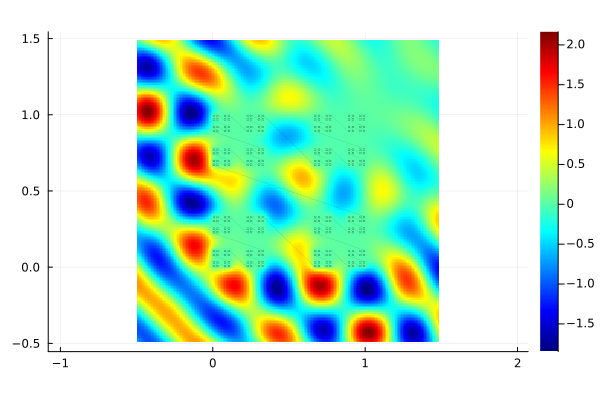

In [8]:
slp = singlelayer_potential_helmholtz(vₕ, k, ambient_dimension = 2)

δ = 0.01
space_ratio = 0.7  # should be bigger than 0.5

# get centre of fractal
Γ_centre = FractalIntegrals.get_boundingball_centre(Γ)
length(Γ_centre) == 1 ? Γ_centre = [Γ_centre[1],0] : Nothing

# build mesh around the centre
x_range = (Γ_centre[1]-space_ratio*Γ.diam):δ:(Γ_centre[1]+space_ratio*Γ.diam)
y_range = (Γ_centre[2]-space_ratio*Γ.diam):δ:(Γ_centre[2]+space_ratio*Γ.diam)
plot_pts = [[x,y] for x in x_range, y in y_range]

# create the total field function
uˢ(x) = -slp(x)
u(x) = uⁱ(x) + uˢ(x)

# plot the total field
heatmap(x_range,y_range,transpose(real.(u.(plot_pts))), aspect_ratio = 1, colormap=:jet)
# plot the fractal on top
plot!(Γ,color=:black, markersize = 0.3)

## Plotting the far-field pattern

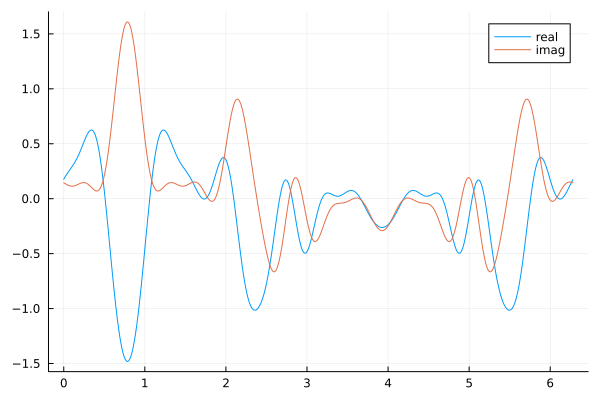

In [9]:
θ = 0:0.01:2π
ffp = farfield_pattern(vₕ, k, ambient_dimension = 2)
plot(θ, [real.(ffp.(θ)), imag.(ffp.(θ))], labels = ["real" "imag"])